### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Basic Tests

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cells below with the desired application and execution settings.

The notebook is designed to test several available fidelity assessment methods and multiple expectation assessment methods.
Run the entire notebook as a sanity check that all methods are operational.


In [1]:
%reload_ext autoreload
%autoreload 2

### Program Configuration 

In [ ]:
# Select the API to use and load the benchmark program
api = "qiskit"
from hamlib import hamlib_simulation_benchmark

# Select the benchmark parameters
min_qubits = 4
max_qubits = 6
skip_qubits=2
max_circuits=1
num_shots=10000

# Select the backend 
backend_id="qasm_simulator"
#backend_id="statevector_simulator"
provider_backend=None
exec_options={}

#############

# place resulting data and images into a folder with "test" suffix
import metrics
metrics.data_suffix = "_test"
hamlib_simulation_benchmark.data_suffix = "_test"


### List of Available Hamiltonians 
For the plotting illustrate below, select one of the available Hamiltonian name, params tuples.
In the cells below, we loop over all these Hamiltonians for testing purposes.

In [3]:
# List of HamLib filename and parameter tuples
hamiltonians = [
    ('condensedmatter/tfim/tfim', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/heisenberg/heis', { "1D-grid": "pbc", "h": 2 }),
    ('condensedmatter/fermihubbard/FH_D-1', { "1D-grid": "pbc", "enc": "bk", "U":12 }),
    ('condensedmatter/bosehubbard/BH_D-1_d-4', { "1D-grid": "nonpbc", "enc": "gray", "U":10 }),
    ('binaryoptimization/max3sat/random/random_max3sat-hams', { "ratio": "2", "rinst": "02" }),
    ('chemistry/electronic/standard/H2', { "ham_BK": "" })
    ]

# Select indices of the Hamiltonian(s) to test
#ham_indexes = range(len(hamiltonians))       # select all
ham_indexes = [1]       # select subset, for example 2,3; for quick test, do just one of them


#### Trace and Debug Options

In [ ]:
"""
# Configure benchmark library modules
from _common.qiskit import execute
execute.verbose = False
execute.verbose_time = False

# ... access to HamLib datasets
from hamlib._common import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
from hamlib.qiskit import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
from hamlib import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

# set noise to None and uncomment the data_suffix to make an ideal simulator if using qasm_simulator
execute.noise = None
#hamlib_simulation_benchmark.data_suffix = ".noisy"
"""
print("")

### Perform Hamiltonian Simulations and Measure Fidelity
Here, we execute the Hamiltonian simulation over an array of different Hamiltonians.
We exercise each of the 3 fidelity assessment methods.



*******************************************************************************************

Hamiltonian Simulation Test for condensedmatter/heisenberg/heis {'1D-grid': 'pbc', 'h': 2}

Testing fidelity assessment method: 1
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 09, 2025 18:42:41 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... number of terms in Hamiltonian = 24
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 150, 0.331
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 157, 0.311, 120.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.024, 0.199, 0.04 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Averag

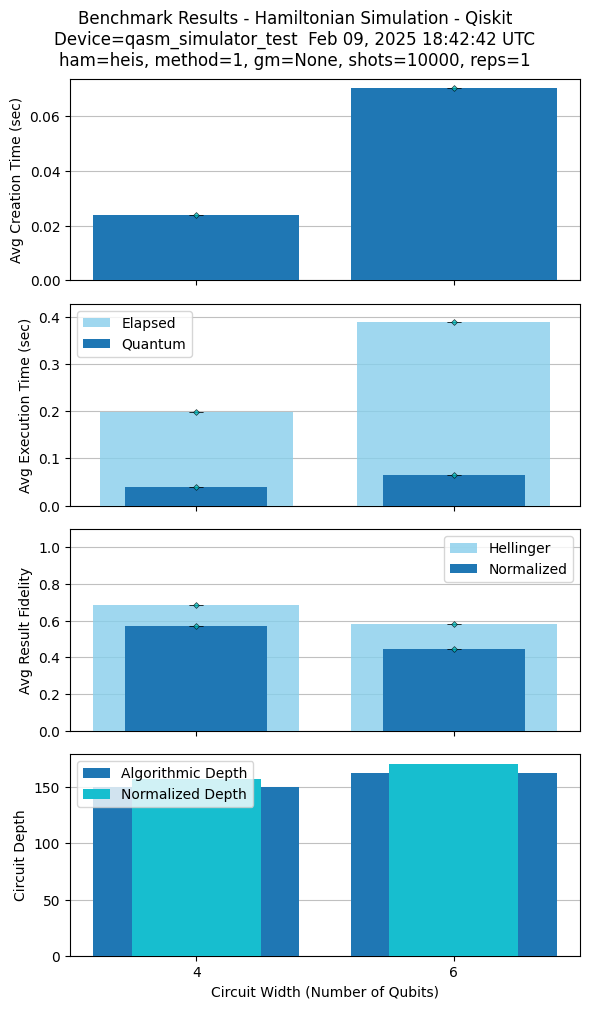

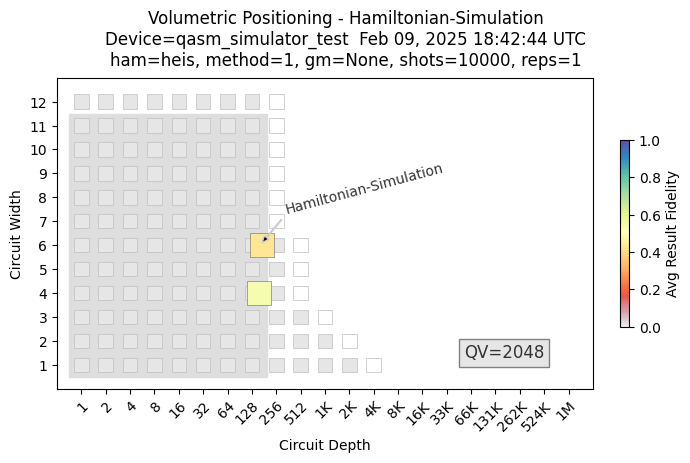

Testing fidelity assessment method: 2
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 09, 2025 18:42:50 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 150, 0.331
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 157, 0.311, 120.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.032, 0.09, 0.04 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.547, 0.446

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... number of terms in Hamiltonian = 24
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 163, 0.331
Average Normalized Transpi

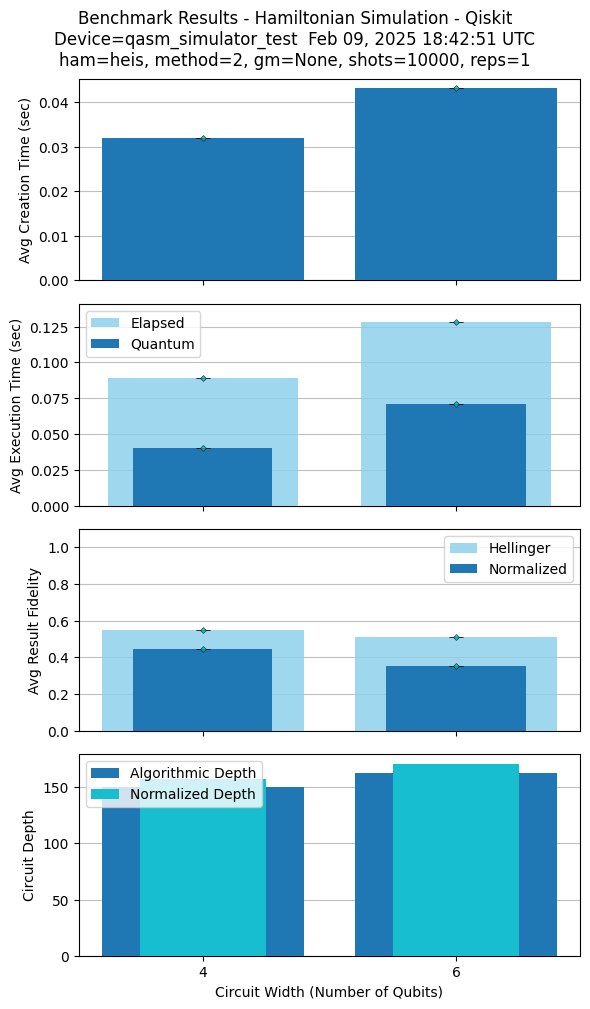

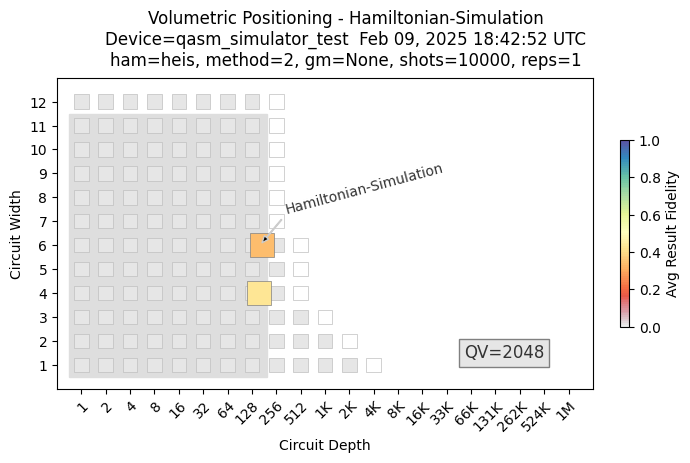

Testing fidelity assessment method: 3
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 09, 2025 18:42:59 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 298, 0.332
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 312, 0.312, 240.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.057, 0.147, 0.071 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.568, 0.527

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... number of terms in Hamiltonian = 24
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 324, 0.332
Average Normalized Trans

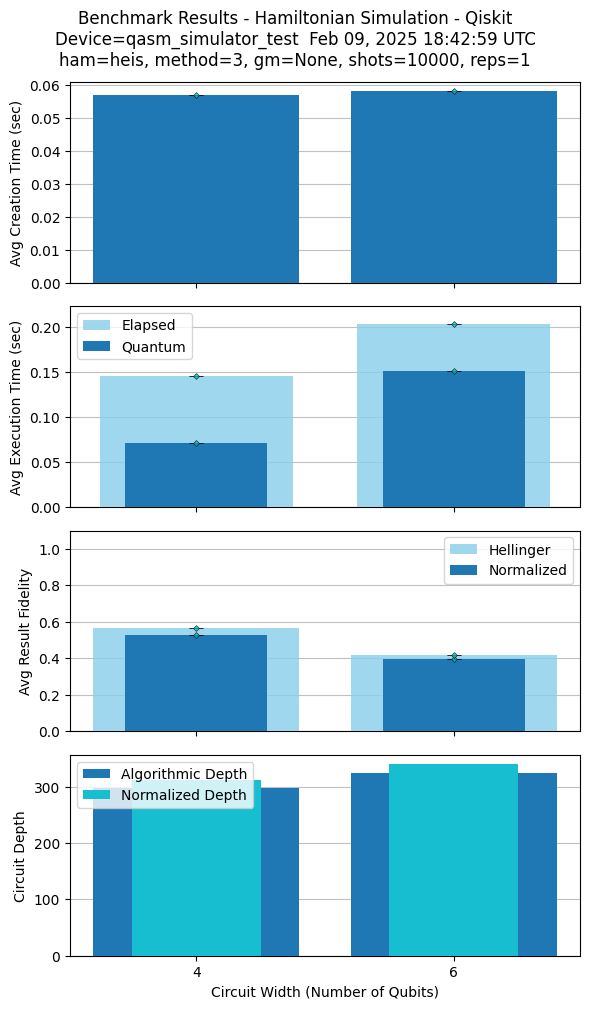

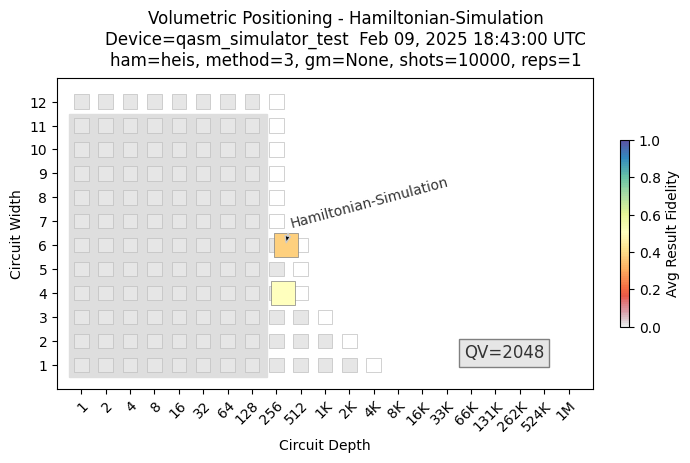

In [5]:
# Loop over Hamiltonians for testing

for i in ham_indexes:
    hamiltonian_name, hamiltonian_params = hamiltonians[ i ]
    
    print(f"\n*******************************************************************************************")

    print(f"\nHamiltonian Simulation Test for {hamiltonian_name} {hamiltonian_params}\n")

    ###################

    for method in [1, 2, 3]:

        print(f"Testing fidelity assessment method: {method}")

        hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                    max_circuits=max_circuits, num_shots=num_shots,
                    method=method,
                    plot_results = True,
                                        
                    hamiltonian = hamiltonian_name,
                    hamiltonian_params = hamiltonian_params,
                    do_sqrt_fidelity = True if method == 3 else False,
                    
                    do_observables = False,
                                    
                    backend_id=backend_id,
                    provider_backend=provider_backend,
                    exec_options=exec_options,
                    api=api)

    

### Combined Results - Fidelity
Plot results from all the fidelity runs.  

Note that this currently only displays the last test run, as the data file is overwritten by each execution.  To be improved later.m

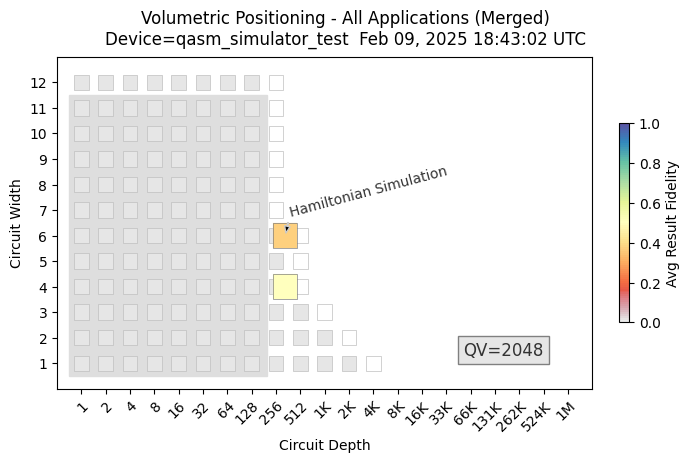

In [ ]:
from _common import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)


### Perform Hamiltonian Simulations and Measure Expectation Accuracy
Here, we execute the Hamiltonian simulation over an array of different Hamiltonians.
We exercise each of several expectation methods and assess the results.



*******************************************************************************************

Hamiltonian Simulation Test for condensedmatter/heisenberg/heis {'1D-grid': 'pbc', 'h': 2}

Testing expectation grouping method: None
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 09, 2025 18:43:09 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
... execute_cicuits(qasm_simulator, 16, 10000)
... number of circuits executed = 16
... quantum execution time = 0.311
... exact computation time = 0.02 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -2.0254
    ==> Simulation Quality: 0.506

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... number of terms in Hamiltonian = 24
... execute_cicuits(qasm_simulator, 24, 10000)
...

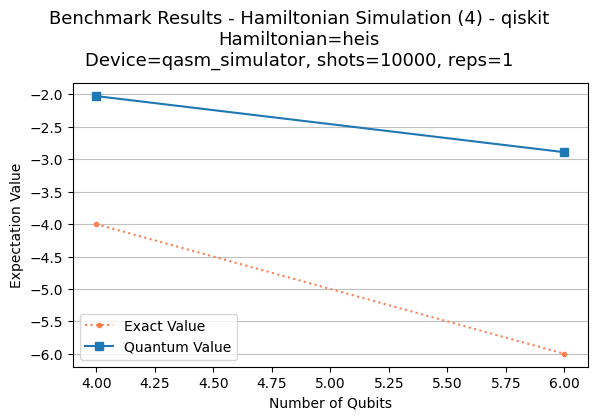

----- Expectation Time Plot -----


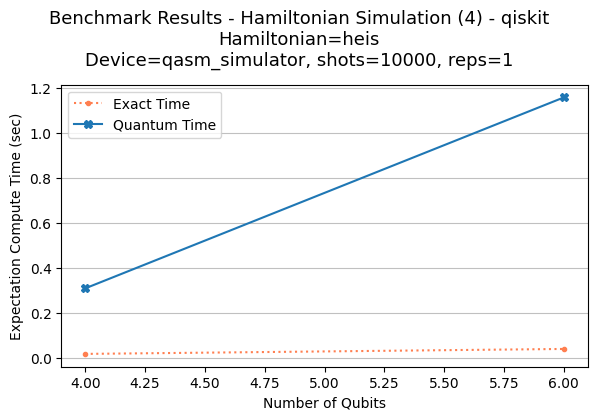

Testing expectation grouping method: simple
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Feb 09, 2025 18:43:17 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... number of terms in Hamiltonian = 16
... execute_cicuits(qasm_simulator, 3, 10000)
... number of circuits executed = 3
... quantum execution time = 0.1
... exact computation time = 0.02 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -1.9922
    ==> Simulation Quality: 0.498

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... number of terms in Hamiltonian = 24
... execute_cicuits(qasm_simulator, 3, 10000)
... number of circuits executed = 3
... quantum execution time = 0.192
... exact computation time = 0.043 sec

    Exact expectation value, computed classically: -6.0
    Estimated expectation

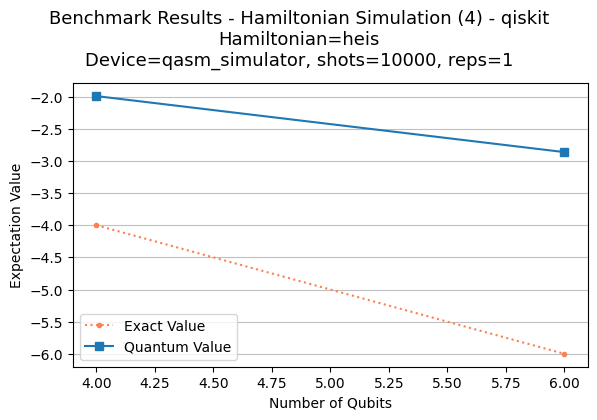

----- Expectation Time Plot -----


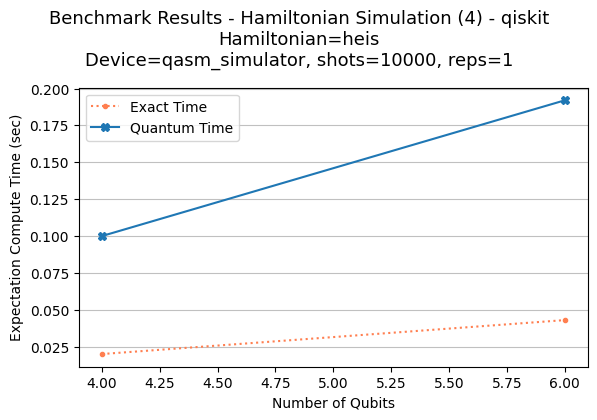

Testing expectation grouping method: N
Hamiltonian Simulation Benchmark Program - Qiskit


In [ ]:
# Loop over Hamiltonians for testing expectation value computation

for i in ham_indexes:
    hamiltonian_name, hamiltonian_params = hamiltonians[ i ]
    
    print(f"\n*******************************************************************************************")

    print(f"\nHamiltonian Simulation Test for {hamiltonian_name} {hamiltonian_params}\n")

    ###################

    for group_method in [ None, "simple", "N", "estimator" ]:

        print(f"Testing expectation grouping method: {group_method}")

        hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                    max_circuits=max_circuits, num_shots=num_shots,
                    method=4,
                    plot_results = True,
                                        
                    hamiltonian = hamiltonian_name,
                    hamiltonian_params = hamiltonian_params,

                    do_observables = True,
                    group_method = group_method,
                                         
                    backend_id=backend_id,
                    provider_backend=provider_backend,
                    exec_options=exec_options,
                    api=api)

    

In [ ]:
import qiskit
print(qiskit.__version__)